# Part II - Ford GoBike System Data Exploration
## by Mary Etokwudo

## Investigation Overview
In this investigation, I wanted to understand the relationship between ride duration and other variables such as the day of the week and part of the day the ride was taken, and the riders details such as gender and age. 


## Dataset Overview

This dataset includes information about 183,412 individual rides made in a bike-sharing system covering the greater San Francisco Bay area, in the month of February 2019. 27,755 data points were removed from the analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
# A lot of data cleaning has been done on the original dataset and would be too long to be added to this presentation. 
# Rather, we load the cleaned dataset and use for the presentation. 
tripdata = pd.read_csv('cleaned_tripdata.csv')

## Duration Vs Age Group

The age group of the riders does not affect the ride duration, as there are similar plots for all the age groups.

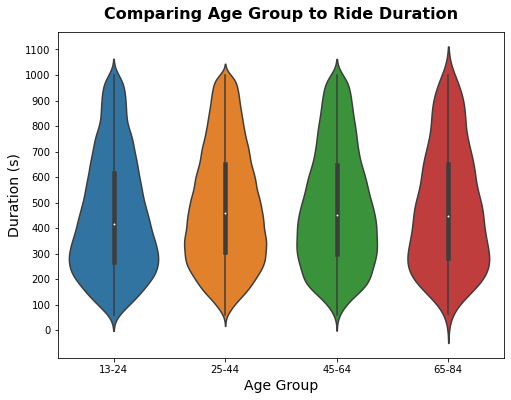

In [4]:
plt.figure(figsize=(8,6))
sb.violinplot(data=tripdata, x='age_group', y='duration_sec');
plt.yticks(ticks=np.arange(0, 1200, step=100))
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Duration (s)', fontsize=14)
plt.title('Comparing Age Group to Ride Duration', fontsize=16, y=1.02, weight="bold")
plt.show()

## Duration Vs Age Vs Gender

The age and the gender of the riders do not affect the ride duration, as the multivariate scatter plot for this shows similar distribution of ride duration for the age and gender.

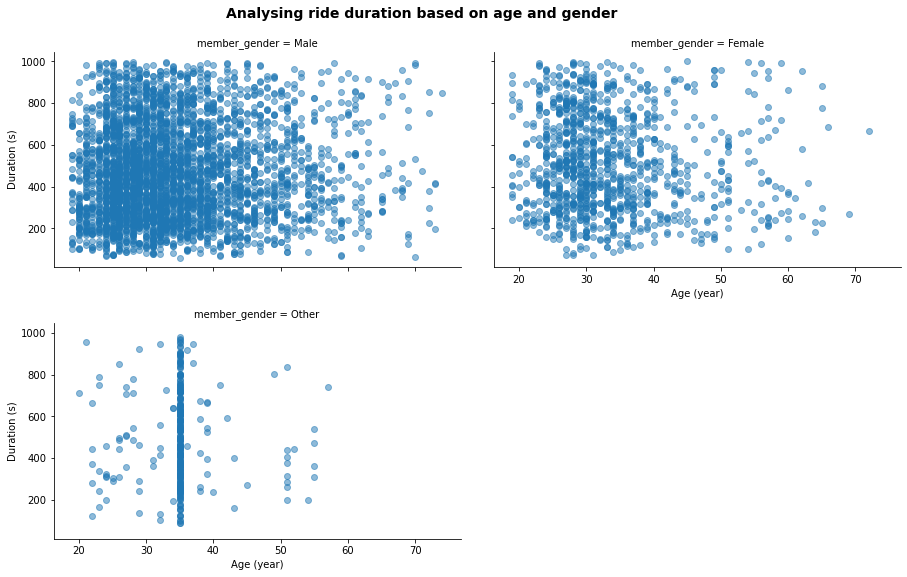

In [5]:
sample_data = tripdata.sample(5000)
g = sb.FacetGrid(data=sample_data, col="member_gender", col_wrap=2)
g = g.map(plt.scatter,"age","duration_sec", alpha=0.5)
g.set_ylabels('Duration (s)')
g.set_xlabels('Age (year)')
g.fig.set_size_inches(14,8)
g.fig.suptitle('Analysing ride duration based on age and gender', y=1.02, fontsize=14, weight="bold")
plt.show()

## Distribution of Duration Across Other Features

Of all the features compared to ride duration, none of them affects the ride duration. This may be because the company has a duration range they allow for riders. It may also be that people generally have a limit to how long they can ride a bike before switching to other means of transportation. For instance, taking a bike from the office to the train or bus station. The next two visualisations show that most riders do not use the bikes for all their trips, also that most of them are subscribers.

## Distribution of User Type and Gender

Most of the trips were taken by male subscribers.

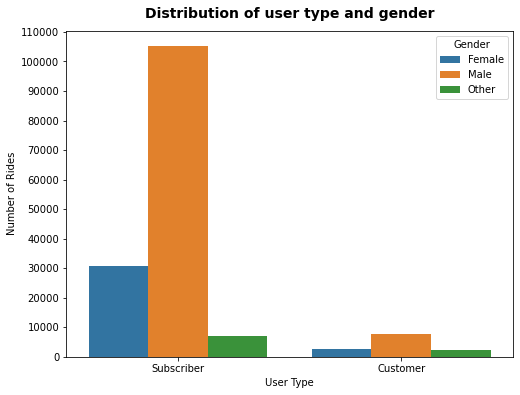

In [6]:
plt.figure(figsize=(8,6))
sb.countplot(data=tripdata, x='user_type', hue='member_gender')
plt.yticks(ticks=np.arange(0, 120000, step=10000))
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.legend(title='Gender')
plt.title('Distribution of user type and gender', fontsize=14, y=1.02, weight="bold")
plt.show()

## Distribution of the top 10 busiest stations, using the start station column.

The buusiest station is the 'Market St at 10th St' station with 3602 rides starting from there.

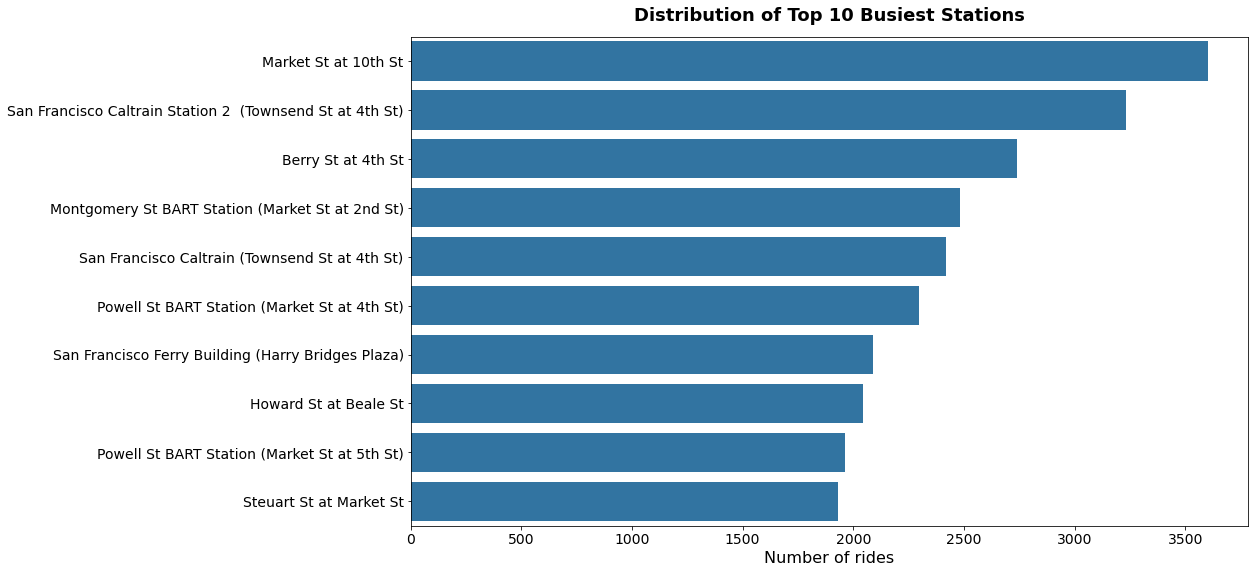

In [7]:
busiest_stations = tripdata.start_station_name.value_counts(ascending=False).head(10).index
color = sb.color_palette()[0]
plt.figure(figsize=(15,9))
sb.countplot(data=tripdata, y='start_station_name', order=busiest_stations, orient = 'h', color=color)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of rides', fontsize=16)
plt.ylabel('')
plt.title('Distribution of Top 10 Busiest Stations', fontsize=18, y=1.02, weight="bold")
plt.show()

## Thank You!

In [9]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 870523 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
^C

Interrupted
